*Day 7*
# Generalization, Underfitting and Overfitting
---

Training is used to fit the model to the data. The model is then used to make predictions on the test data. The goal is to make predictions on new data that the model has not seen before. This is called generalization.

No one method dominates over all other models for all datasets. The goal of applied machine learning is to find a model that performs well or best for a given dataset.


## Underfitting and Overfitting

**Underfitting**
- Too simple
- Does not capture the trend in the data
- e.g: Linear Regression on non-linear data

Solution:
- Train more complex model
- Obtain more data

--- 

**Overfitting**
- Too complex
- Fits the training data too well, but fail to generalize to new data
- Does not generalize to new data
- e.g: Decision Tree with no depth limit

Solution:
- Reduce number of samples
- Increase training samples

To avoid underfitting and overfitting, we need to find the right balance between bias and variance.

A good model has slightly lower training error than model error.



## Applying Machine Learning

## 1. Data Setup

In [1]:

## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [2]:
#ML Library

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Dataset frkm sklearn

from sklearn.datasets import load_breast_cancer, load_diabetes

In [7]:
load_breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

In [9]:
#Load Dataset
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [16]:
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [17]:
cancerdf['target'] = cancer['target']

In [18]:
cancerdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 2. Feature Engineering

In [36]:
#Train test split
x = cancerdf.drop('target', axis=1)  # All cols except default as ind var (x)
y = cancerdf['target']               # default col as target (y) 

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size= 0.2,    # Test Data Size as 20% 
    random_state=2020,   # Random seed
    stratify=y         # Proportion between train & test, same propotion as y 
)

## 3. Understanding How Model Hyperparameters Affect Performance

## 3.1 KNN with Varying K 

In [37]:
#Modelling with kNN, varying n_neighbors parameter 1-20
#Use loops

train_acc = []
test_acc = []

kvalues = []
k_score_dictionary = {}

score = 0

for k in range(1, 21, 2):
    knn_multi_k = KNeighborsClassifier(n_neighbors=k)
    knn_multi_k.fit(xtrain, ytrain)
    
    ypred_train = knn_multi_k.predict(xtrain.values)
    train_acc.append(accuracy_score(ytrain, ypred_train))
    
    # Print report
    y_pred_test_knn = knn_multi_k.predict(xtest.values)
    acc = accuracy_score(ytest, y_pred_test_knn)
    
    kvalues.append(k)  # Append the k value to kvalues
    test_acc.append(acc)  # Append the accuracy to test_acc
    k_score_dictionary[k] = acc  # Store accuracy in the dictionary
    
    #Find best k value with minimal difference between train and test accuracy
    score_diff = abs(acc - train_acc[-1])   # Calculate the difference between train and test accuracy
    
    if score < acc:
        score = acc
        
        best_k = k
    
    
# Create a DataFrame to store k-values and their corresponding accuracies
df_knn_score = pd.DataFrame({'k': kvalues, 'train accuracy': train_acc, 'test_accuracy': test_acc})




In [44]:
best_k

1

In [39]:
df_knn_score.sort_values(by='test_accuracy', ascending=False)

,k,train accuracy,test_accuracy
0,1,1.000000,0.964912
2,5,0.940659,0.956140
3,7,0.938462,0.956140
4,9,0.936264,0.947368
5,11,0.931868,0.947368
6,13,0.934066,0.947368
7,15,0.931868,0.947368
1,3,0.947253,0.938596
8,17,0.929670,0.938596
9,19,0.931868,0.938596


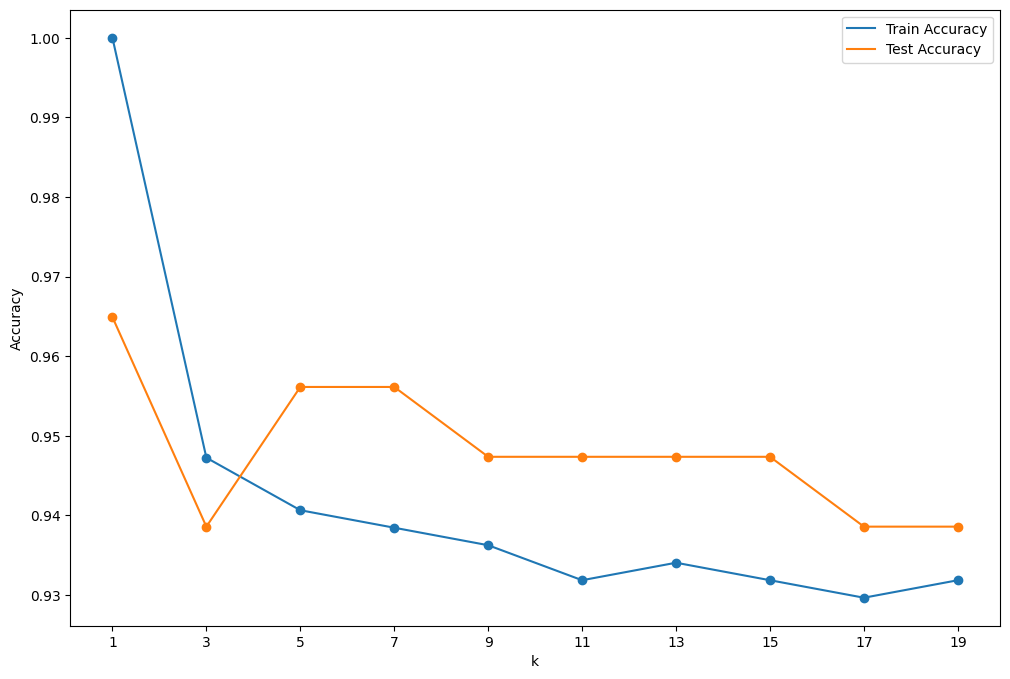

In [43]:
#Plotting the accuracy score for train and test data
plt.figure(figsize=(12, 8))
plt.plot(kvalues, train_acc, label='Train Accuracy')
plt.scatter(kvalues, train_acc)
plt.plot(kvalues, test_acc, label='Test Accuracy')
plt.scatter(kvalues, test_acc)
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(kvalues)
plt.show()


## 3.2 Decision Tree with Varying Depth

In [45]:
#Build model

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain) #apply model to training data (xtrain,ytrain)

DecisionTreeClassifier()

In [68]:
#Modeling with Decision Tree, varying max_depth parameter 
#Create looping

md = np.arange(1, 151,1)
acc_train = []
acc_test = []
max_depth = []

for i in md:
    for j in crit:
        dtc = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=2020)
        dtc.fit(xtrain, ytrain)
        ypred_train = dtc.predict(xtrain)
        ypred_test = dtc.predict(xtest)
        
        acc_train.append(accuracy_score(ytrain, ypred_train))
        acc_test.append(accuracy_score(ytest, ypred_test))
        max_depth.append((i))

In [77]:
#Create dataframe of result

df_result = pd.DataFrame({'max_depth':max_depth, 'train_accuracy_score':acc_train,'test_accuracy_score':acc_test})

In [88]:
df_result.sort_values(by='test_accuracy_score', ascending=False)

,max_depth,train_accuracy_score,test_accuracy_score
4,5,0.991209,0.938596
5,6,0.993407,0.938596
75,76,1.000000,0.929825
104,105,1.000000,0.929825
97,98,1.000000,0.929825
...,...,...,...
43,44,1.000000,0.929825
6,7,1.000000,0.929825
1,2,0.949451,0.921053
3,4,0.982418,0.921053


In [89]:
df_result['diff'] = abs(df_result['train_accuracy_score'] - df_result['test_accuracy_score'])

In [99]:
df_result.sort_values(by=['test_accuracy_score','diff'], ascending=[False, True])

,max_depth,train_accuracy_score,test_accuracy_score,diff
4,5,0.991209,0.938596,0.052612
5,6,0.993407,0.938596,0.054810
2,3,0.973626,0.929825,0.043802
6,7,1.000000,0.929825,0.070175
7,8,1.000000,0.929825,0.070175
...,...,...,...,...
148,149,1.000000,0.929825,0.070175
149,150,1.000000,0.929825,0.070175
1,2,0.949451,0.921053,0.028398
3,4,0.982418,0.921053,0.061365


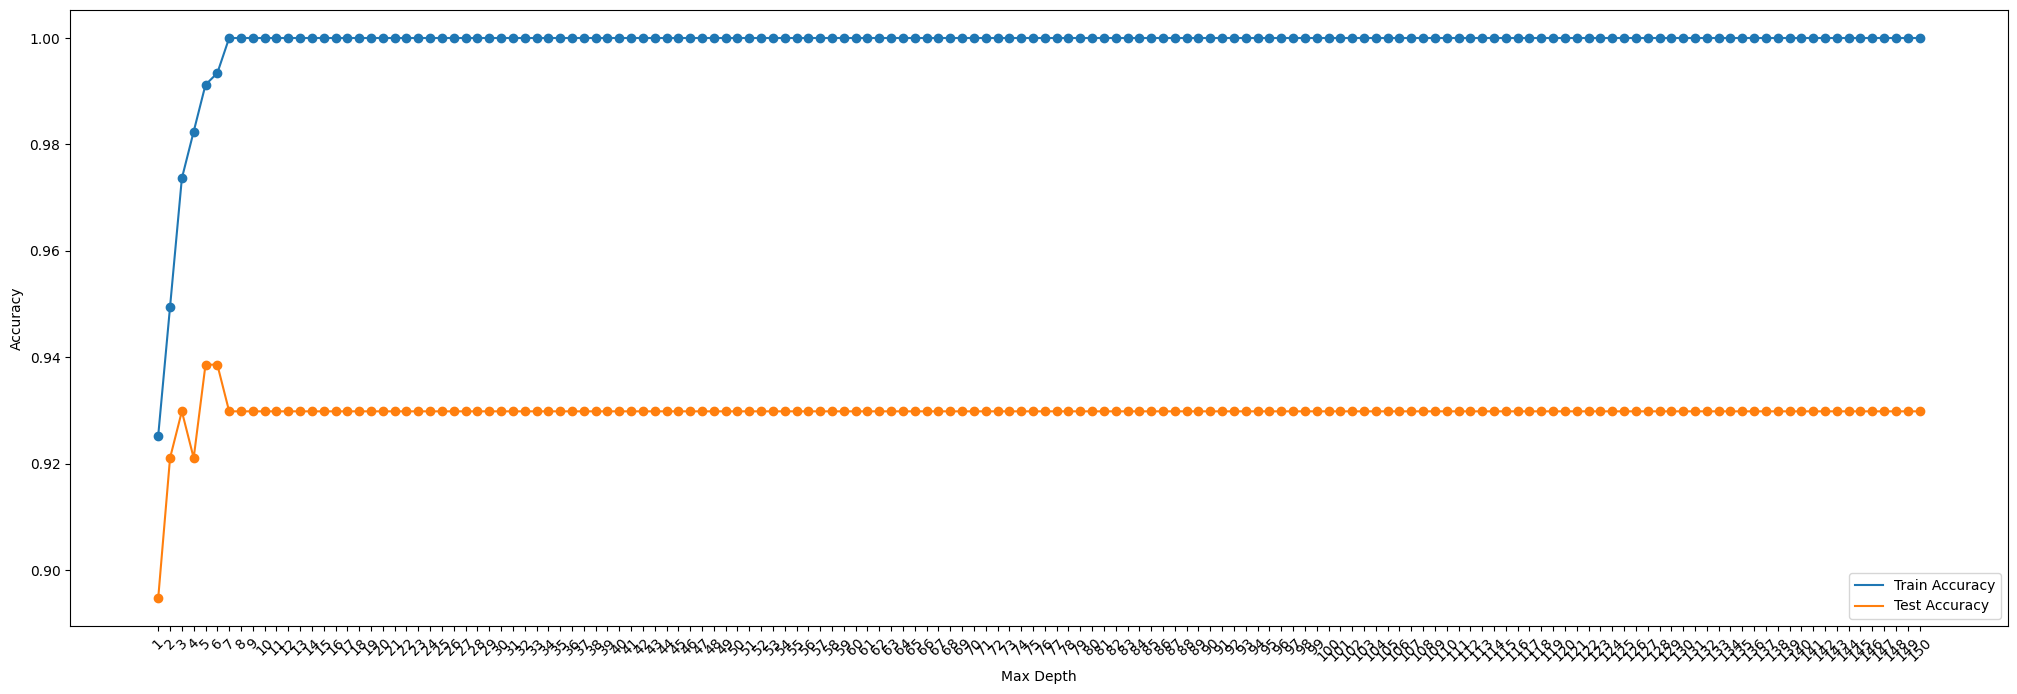

In [87]:
#Plotting the accuracy score for train and test data
plt.figure(figsize=(25, 8))
plt.plot(df_result['max_depth'], df_result['train_accuracy_score'], label='Train Accuracy')
plt.scatter(df_result['max_depth'], df_result['train_accuracy_score'])
plt.plot(df_result['max_depth'], df_result['test_accuracy_score'], label='Test Accuracy')
plt.scatter(df_result['max_depth'], df_result['test_accuracy_score'])
# plt.plot(df_result['max_depth'], test_acc, label='Test Accuracy')
# plt.scatter(df_result['max_depth'], test_acc)
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(df_result['max_depth'], rotation=45)
plt.show()


## 3.2 Logistic Regression with Ridge Regularization

Ridge(L1 Regularization) vs Lasso (L2 Regularization) model for linear regression


